In [1]:
%matplotlib inline
import requests
import pandas as pd

import os
import sys
path = os.path.abspath('../')
sys.path.append(path)

In [2]:
from cgsn_parsers.parsers.parse_optaa import Parser

In [3]:
# Coastal Endurance Oregon Shelf Surface Mooring NSIF (7 meters) OPTAA data
baseurl = "https://rawdata.oceanobservatories.org/files/CE02SHSM/D00003/cg_data/dcl27/optaa/"
fname = "20160518_123019.optaa.log"

# initialize the Parser object for MOPAK
optaa = Parser(baseurl + fname)
r = requests.get(optaa.infile, verify=True) # use verify=False for expired certificate

In [4]:
optaa.raw = r.content
len(optaa.raw), optaa.raw[:4]

(449414, b'\xff\x00\xff\x00')

In [5]:
optaa.parse_data()
optaa.data.keys()

dict_keys(['external_temp_raw', 'elapsed_run_time', 'a_reference_raw', 'pressure_raw', 'a_signal_dark', 'time', 'internal_temp_raw', 'c_signal_raw', 'a_signal_raw', 'serial_number', 'c_reference_dark', 'c_reference_raw', 'c_signal_dark', 'a_reference_dark', 'num_wavelengths'])

In [6]:
optaa.data.time[:5]

[1463574619.0, 1463574619.248, 1463574619.497, 1463574619.748, 1463574619.999]

In [7]:
df = pd.DataFrame(optaa.data)
df['dt_utc'] = pd.to_datetime(df.time, unit='s')
df.set_index('dt_utc', drop=False, inplace=True)

In [8]:
df.shape, df.columns

((653, 16),
 Index(['a_reference_dark', 'a_reference_raw', 'a_signal_dark', 'a_signal_raw',
        'c_reference_dark', 'c_reference_raw', 'c_signal_dark', 'c_signal_raw',
        'elapsed_run_time', 'external_temp_raw', 'internal_temp_raw',
        'num_wavelengths', 'pressure_raw', 'serial_number', 'time', 'dt_utc'],
       dtype='object'))

In [9]:
df.dtypes

a_reference_dark              int64
a_reference_raw              object
a_signal_dark                 int64
a_signal_raw                 object
c_reference_dark              int64
c_reference_raw              object
c_signal_dark                 int64
c_signal_raw                 object
elapsed_run_time              int64
external_temp_raw             int64
internal_temp_raw             int64
num_wavelengths               int64
pressure_raw                  int64
serial_number                 int64
time                        float64
dt_utc               datetime64[ns]
dtype: object

In [10]:
df.tail(5)

a_reference_dark  \
dt_utc                                      
2016-05-18 12:33:02.239               464   
2016-05-18 12:33:02.490               465   
2016-05-18 12:33:02.740               465   
2016-05-18 12:33:02.990               465   
2016-05-18 12:33:03.240               465   

                                                           a_reference_raw  \
dt_utc                                                                       
2016-05-18 12:33:02.239  (979, 1107, 1241, 1382, 1548, 1712, 1904, 2107...   
2016-05-18 12:33:02.490  (969, 1104, 1239, 1380, 1547, 1718, 1904, 2109...   
2016-05-18 12:33:02.740  (975, 1102, 1237, 1383, 1548, 1722, 1905, 2104...   
2016-05-18 12:33:02.990  (974, 1108, 1246, 1383, 1549, 1716, 1900, 2106...   
2016-05-18 12:33:03.240  (975, 1104, 1241, 1386, 1541, 1722, 1907, 2109...   

                         a_signal_dark  \
dt_utc                                   
2016-05-18 12:33:02.239            664   
2016-05-18 12:33:02.490            665   
2016-05-18 12:33:02.740            665   
2016-05-18 12:33:02.990            665   
2016-05-18 12:33:03.240            665   

                                                              a_signal_raw  \
dt_utc                                                                       
2016-05-18 12:33:02.239  (1387, 1615, 1866, 2129, 2438, 2762, 3131, 353...   
2016-05-18 12:33:02.490  (1366, 1600, 1848, 2113, 2417, 2741, 3106, 350...   
2016-05-18 12:33:02.740  (1367, 1592, 1835, 2104, 2400, 2728, 3083, 347...   
2016-05-18 12:33:02.990  (1377, 1610, 1864, 2124, 2430, 2759, 3125, 352...   
2016-05-18 12:33:03.240  (1385, 1615, 1865, 2134, 2431, 2770, 3129, 353...   

                         c_reference_dark  \
dt_utc                                      
2016-05-18 12:33:02.239               471   
2016-05-18 12:33:02.490               471   
2016-05-18 12:33:02.740               471   
2016-05-18 12:33:02.990               471   
2016-05-18 12:33:03.240               471   

                                                           c_reference_raw  \
dt_utc                                                                       
2016-05-18 12:33:02.239  (744, 846, 957, 1077, 1212, 1356, 1508, 1677, ...   
2016-05-18 12:33:02.490  (740, 849, 960, 1074, 1211, 1363, 1508, 1678, ...   
2016-05-18 12:33:02.740  (739, 846, 958, 1075, 1215, 1358, 1510, 1670, ...   
2016-05-18 12:33:02.990  (738, 845, 958, 1076, 1209, 1356, 1507, 1670, ...   
2016-05-18 12:33:03.240  (741, 849, 959, 1078, 1209, 1355, 1509, 1674, ...   

                         c_signal_dark  \
dt_utc                                   
2016-05-18 12:33:02.239            710   
2016-05-18 12:33:02.490            710   
2016-05-18 12:33:02.740            709   
2016-05-18 12:33:02.990            710   
2016-05-18 12:33:03.240            710   

                                                              c_signal_raw  \
dt_utc                                                                       
2016-05-18 12:33:02.239  (782, 933, 1094, 1281, 1491, 1732, 1982, 2265,...   
2016-05-18 12:33:02.490  (787, 941, 1108, 1295, 1511, 1756, 2014, 2300,...   
2016-05-18 12:33:02.740  (788, 942, 1109, 1295, 1516, 1757, 2013, 2298,...   
2016-05-18 12:33:02.990  (763, 912, 1081, 1270, 1487, 1726, 1980, 2265,...   
2016-05-18 12:33:03.240  (783, 939, 1105, 1290, 1501, 1741, 1997, 2279,...   

                         elapsed_run_time  external_temp_raw  \
dt_utc                                                         
2016-05-18 12:33:02.239            173411              39145   
2016-05-18 12:33:02.490            173662              39145   
2016-05-18 12:33:02.740            173912              39147   
2016-05-18 12:33:02.990            174162              39143   
2016-05-18 12:33:03.240            174412              39143   

                         internal_temp_raw  num_wavelengths  pressure_raw  \
dt_utc                                                                      
2016-05-18 1

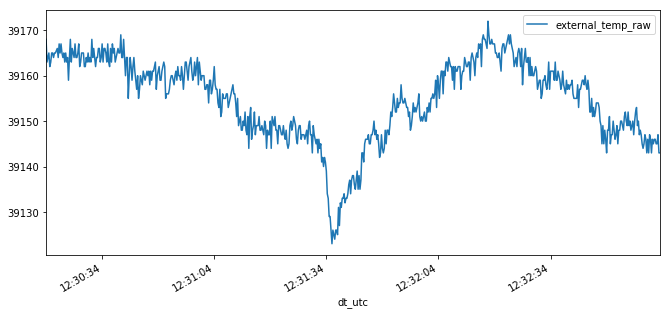

In [11]:
df[['external_temp_raw']].plot(figsize=(11,5));